# Q- Building a SARIMA model to predict the no. of passengers training for next 2 years

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
air= pd.read_csv('./AirPassengers.csv')
air.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [4]:
air= pd.read_csv('./AirPassengers.csv',
                parse_dates=['Month'])
air.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [5]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


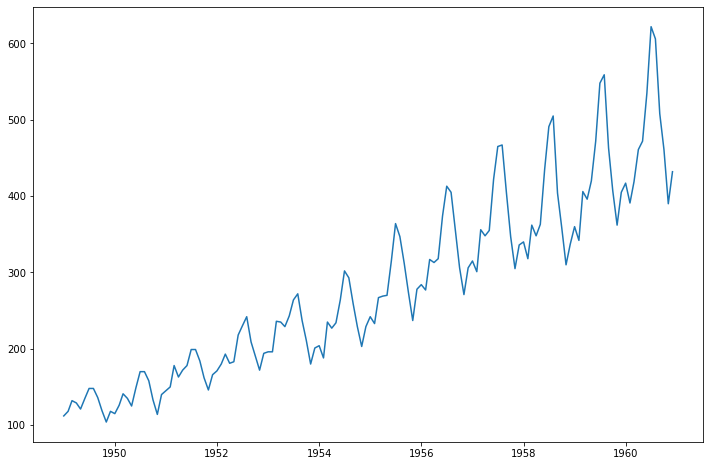

In [6]:
plt.figure(figsize=(12,8))
plt.plot(air['Month'],air['#Passengers'])

The graph contains trend component and seasonal component

In [7]:
air.rename({'#Passengers':"No. of Pessengers training"}, inplace =True, axis = 1)

In [8]:
air.head()

,Month,No. of Pessengers training
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [9]:
air.set_index("Month", inplace = True)

In [10]:
air.head()

,No. of Pessengers training
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [11]:
air.isnull().sum()

No. of Pessengers training    0
dtype: int64

# Check for stationarity

In [12]:
# Using adfuller test to check stationarity
from statsmodels.tsa.stattools import adfuller

In [13]:
results = adfuller(air)

In [14]:
print("Test Statistics : ", results[0])
print("P Value : ", results[1])
print("Critical Values : \n", results[4])

p_value = results[1]
if p_value <0.05:
    print("Series is stationary")
else:
    print("Series is not stationary")

Test Statistics :  0.8153688792060497
P Value :  0.991880243437641
Critical Values : 
 {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}
Series is not stationary


Since the series is not stationary perform differencing on the data to make it stationary

We can use 2 of the either technqiues like air.diff () or shift technique for differencing 

#### 1st order Differencing 

In [15]:
air_diff = air.diff()

In [16]:
air_diff

,No. of Pessengers training
Month,
1949-01-01,NaN
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
...,...
1960-08-01,-16.0
1960-09-01,-98.0
1960-10-01,-47.0


In [17]:
result= adfuller(air_diff.dropna())

In [18]:
print('Test Statistics :', result[0])
print('P Value :', result[1])
print("Critical Values: \n", result[4])

p_value = result[1]
if p_value< 0.05:
    print("The series is Stationsary")
else:
    print("The series is not Stationsary")

Test Statistics : -2.8292668241699963
P Value : 0.05421329028382592
Critical Values: 
 {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}
The series is not Stationsary


#### 2 order differencing

In [19]:
air_diff2 = air_diff.diff()

In [20]:
result= adfuller(air_diff.diff().dropna())

In [21]:
print('Test Statistics :', result[0])
print('P Value :', result[1])
print("Critical Values: \n", result[4])

p_value = result[1]
if p_value< 0.05:
    print("The series is Stationary")
else:
    print("The series is not Stationary")

Test Statistics : -16.38423154246852
P Value : 2.732891850014085e-29
Critical Values: 
 {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}
The series is Stationary


---

In [22]:
# Since the data has monthly seasonality we would do the differecing with lag = 12

air_diff12 = air.diff(12)

In [23]:
air_diff12.head(20)

,No. of Pessengers training
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [24]:
result= adfuller(air_diff12.dropna())

In [25]:
print('Test Statistics :', result[0])
print('P Value :', result[1])
print("Critical Values: \n", result[4])

p_value = result[1]
if p_value< 0.05:
    print("The series is Stationary")
else:
    print("The series is not Stationary")

Test Statistics : -3.3830207264924796
P Value : 0.011551493085515008
Critical Values: 
 {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}
The series is Stationary


# We will now identify the 3 components of ARIMA which are :

p - 

d - 1 (We have done only 1 time differencing so thats's why we are taking d=1 as the data was seasonal)

q -

for identifying p and q component we need 2 graphs

P- can be identifed using PACF plot

Q- Can be identified using ACF plot

In [26]:
# Let us plot the ACF graph

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

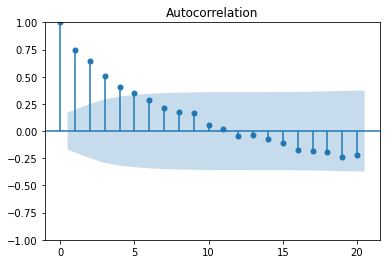

In [27]:
acf= plot_acf(air_diff12.dropna(), lags=20) # ACF plot gives you the q value

# Highlighted area: Insignificant area
for this problem we are talking q = 5 after 5 we are getting the value , or the values are going into the insgnificant area

We are chose q =5, sice after 5 lags the data of the series becomes insignificant 

Note: The first point in graph should not be taken in count while calculating p value

G:\Anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


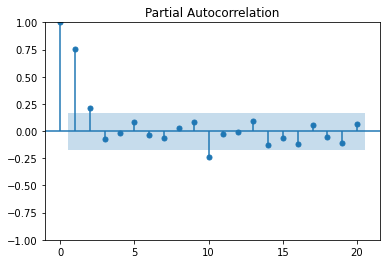

In [28]:
pacf= plot_pacf(air_diff12.dropna(), lags=20) # ACF plot gives you the p value

for this problem p = 2 and 10 can be taken since after 2 lags the data becomes insignificant

In [29]:
# the order for my model is(p,d,q) = (2,1,5)

In [30]:
from statsmodels.tsa.arima_model import ARIMA

In [31]:
air

,No. of Pessengers training
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [32]:
# Let us split the data into train and test
len(air)

144

In [33]:
# Suppose we would be using 120 months data for training and 24 months data for testing
# for training and testing the data in time series we cant use sklearn model or library ,
# we need to use iloc here

train =air.iloc[:120]
test=air.iloc[120:]

In [34]:
len(train)

120

In [35]:
len(test)

24

# Sarima Model

In [36]:
#Creating a SARIMAX model to deal with seasonality

from statsmodels.tsa.statespace.sarimax import SARIMAX

In [37]:
model_SARIMA = SARIMAX (train,order=(2,1,5),seasonal_order=(0,1,0,12))

G:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
G:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [38]:
SARIMA = model_SARIMA.fit()

G:\Anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [39]:
test

,No. of Pessengers training
Month,
1959-01-01,360
1959-02-01,342
1959-03-01,406
1959-04-01,396
1959-05-01,420
1959-06-01,472
1959-07-01,548
1959-08-01,559
1959-09-01,463


In [40]:
test.index[0]

Timestamp('1959-01-01 00:00:00')

In [41]:
test.index[-1]

Timestamp('1960-12-01 00:00:00')

In [42]:
start = test.index[0]
end= test.index[-1]

In [43]:
test['Prediction SARIMA'] = SARIMA.predict(start=start, end= end)

C:\Users\SOMEDIP PC\AppData\Local\Temp\ipykernel_2332\3938134494.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Prediction SARIMA'] = SARIMA.predict(start=start, end= end)


In [44]:
test.head()

,No. of Pessengers training,Prediction SARIMA
Month,,
1959-01-01,360,350.976095
1959-02-01,342,322.554584
1959-03-01,406,375.610916
1959-04-01,396,358.761780
1959-05-01,420,378.084468


### Forecasting the no. of pessengers training for next 2 years

<AxesSubplot:xlabel='Month'>

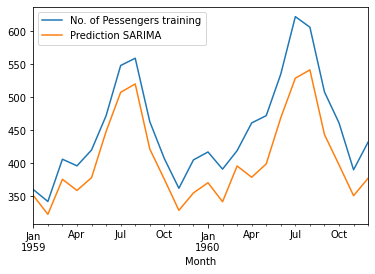

In [46]:
test[['No. of Pessengers training','Prediction SARIMA']].plot()